### Import modules

In [2]:
import os 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, LSTM, Dense
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


### Model save directory setting

In [3]:
save_path = './Results/'
if not os.path.exists(save_path):
    os.mkdir(save_path)

### Hyper-parameters

In [4]:
max_features = 10000
maxlen = 100
embed_dim = 50
sel_embedd = 100

### Preprocess data

In [5]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\user\anaconda3\envs\ai\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\user\anaconda3\envs\ai\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated

### Create model

In [6]:
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(max_features, embed_dim, name='Embedd')(input_layer)
conv_layer = Conv1D(32, 7, activation='relu')(embedding_layer)
lstm_layer = LSTM(32)(conv_layer)
output_layer = Dense(1, activation='sigmoid')(lstm_layer)

model = Model(inputs=input_layer, outputs=output_layer)

### Train models

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['AUC'])
history = model.fit(x_train, y_train, epochs=30, batch_size=1000, validation_split=0.2)

Epoch 1/30
20/20 [==============================] - 10s 233ms/step - loss: 0.6733 - auc: 0.6157 - val_loss: 0.5153 - val_auc: 0.8526
Epoch 2/30
20/20 [==============================] - 1s 50ms/step - loss: 0.4486 - auc: 0.8836 - val_loss: 0.4112 - val_auc: 0.9033
Epoch 3/30
20/20 [==============================] - 1s 50ms/step - loss: 0.3643 - auc: 0.9226 - val_loss: 0.3809 - val_auc: 0.9131
Epoch 4/30
20/20 [==============================] - 1s 50ms/step - loss: 0.3027 - auc: 0.9464 - val_loss: 0.3727 - val_auc: 0.9173
Epoch 5/30
20/20 [==============================] - 1s 50ms/step - loss: 0.2619 - auc: 0.9592 - val_loss: 0.4112 - val_auc: 0.9160
Epoch 6/30
20/20 [==============================] - 1s 52ms/step - loss: 0.2439 - auc: 0.9650 - val_loss: 0.3906 - val_auc: 0.9184
Epoch 7/30
20/20 [==============================] - 1s 49ms/step - loss: 0.2169 - auc: 0.9711 - val_loss: 0.3964 - val_auc: 0.9181
Epoch 8/30
20/20 [==============================] - 1s 48ms/step - loss: 0.1848 -

### Analyze embeddings

In [8]:
embedding_matrix = model.get_layer('Embedd').get_weights()[0]

### Randomly select a subset of embedding vectors to make computation feasible.
np.random.seed(1)
sel_embedding_matrix = np.random.permutation(embedding_matrix)[:sel_embedd]

cosine_sim = cosine_similarity(sel_embedding_matrix)

### Visualize cosine similarity

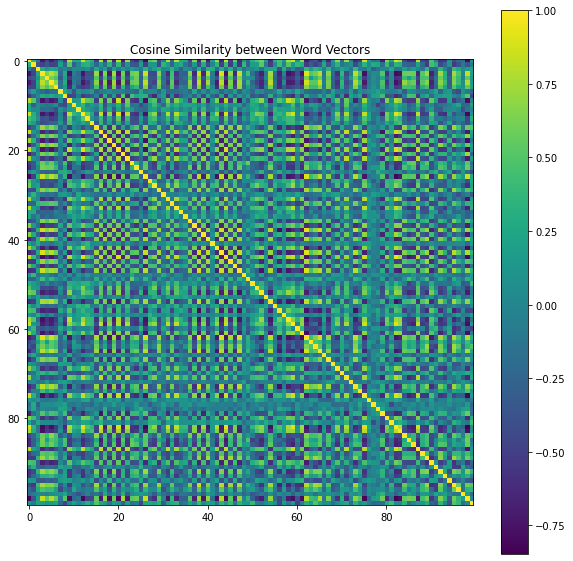

In [9]:
plt.figure(figsize=(10, 10))
plt.imshow(cosine_sim, cmap='viridis')
plt.colorbar()
plt.title("Cosine Similarity between Word Vectors")
plt.show()

### Visualize cosine similarity with clustering

<Figure size 864x864 with 0 Axes>

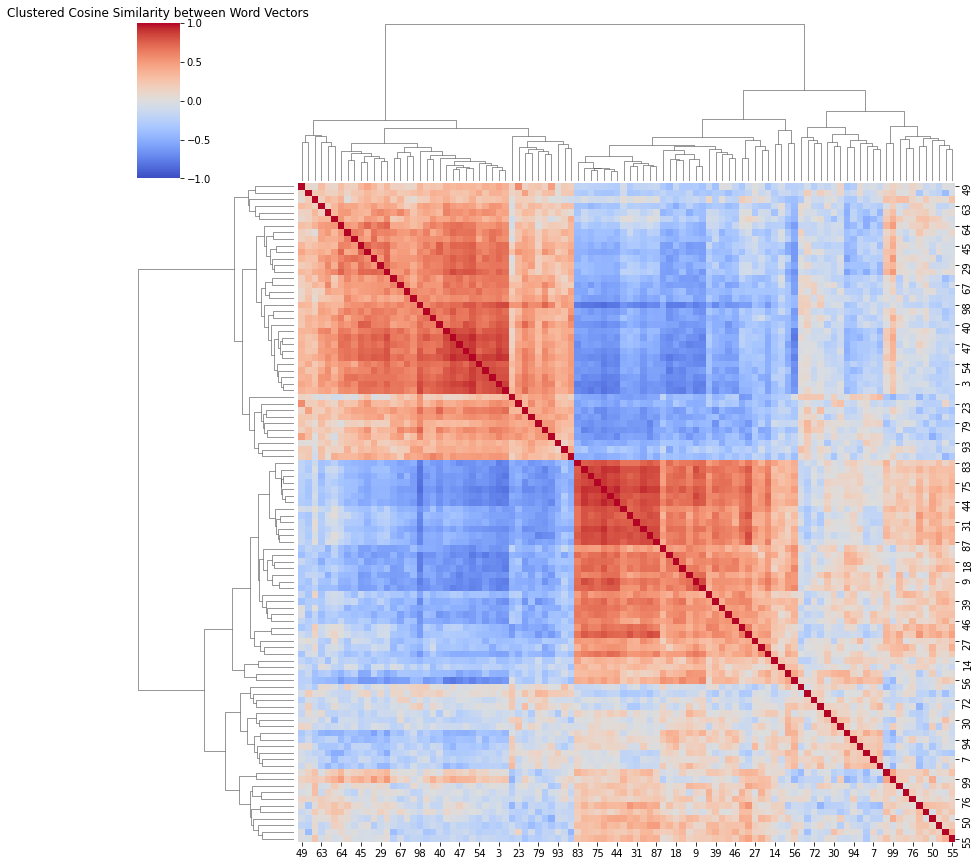

In [11]:
plt.figure(figsize=(12, 12))
sns.clustermap(cosine_sim, cmap='coolwarm', vmin=-1, vmax=1, figsize=(12, 12),row_cluster=True, col_cluster=True)
plt.title("Clustered Cosine Similarity between Word Vectors")
plt.show()
